                                                 Trends in EU Sectoral GHG Emissions:
                                                  A Panel Data Analysis of Country and
                                                    Sector Contributions (2018–2023)

**Author:** Assmaa Fouqade

**Date:** January 2026

**Purpose:** Analyze EU GHG emissions trends across the 27-EU countries with a focus on sectoral contributions and emissions changes over the study period.

**Introduction**

This notebook analyzes sectoral green house gas (GHG) emissions trends across the EU member states between 2018 and 2023.

The analysis focuses on three high emitting sectors: energy, industry and transport, and examines emissions and emissions reductions at both country and EU

levels using absolute and per-capita metrics.







**Executive summary**

- EU GHG emissions decreased overall from 2018 to 2023, with the largest reductions in the energy and industry sectors.

- Transport emissions fluctuated and remained close to initial levels over the period.

- Per-capita emissions in 2023 vary widely across EU countries.

- Country–sector patterns: Eastern Europe transport sector saw the largest increases, while Western European energy and industry sectors achieved the largest

  emissions reductions.


- Germany leads overall reductions across all sectors.







**Data and Methodology**

Data sources

  - GHG Emissions : Eurostat (dataset code: env_ac_ainah_r2)

  - Population : Eurostat (dataset code: demo_pjan)

Coverage

- Sectors : energy, industry and transport (dataset code: NACE- BCDH level 1)

- Geopolitical entity : EU-27

- Time period : 2018 - 2023

- Frequency : Annual

Units

  - GHG Emissions: tonnes of CO₂equivalent

  - Population: Number

Data format

CSV files

Methodology

- Customized and downloaded datasets from Eurostat

- Loaded data into Python using Pandas

- Inspected and cleaned data (missing values, quality check, harmonisation)

- Merged population dataset to emissions dataset

- Compute key indicators (absolute emissions, year-to-year emissions change, per-capita emissions, overtime emissions change)

- Generate summary tables

- Visualised results using plots and charts

**Import Python libraries** and
**prepare EU countries list**

In [1]:
# Import Pandas library
import pandas as pd

# Import matplotlib.pyplot library
import matplotlib.pyplot as plt

# List of EU-27 countries
eu_countries = [
    'Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark',
    'Estonia','Finland','France','Germany','Greece','Hungary','Ireland',
    'Italy','Latvia','Lithuania','Luxembourg','Malta','Netherlands','Poland',
    'Portugal','Romania','Slovakia','Slovenia','Spain','Sweden']

**GHG EMISSIONS DATA PREPARATION**

**Load GHG emissions dataset**

In [2]:
df = pd.read_csv('/Users/asmaafouqade/Desktop/estat.csv')

**Data inspection**

In [3]:
from IPython.display import display

# Check data values
display(df.head())

# Check shape
print("Shape:",df.shape)

#Check columns
display(df.columns)

# Check infos
df.info()

,DATAFLOW,LAST UPDATE,freq,airpol,nace_r2,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:ENV_AC_AINAH_R2(1.0),28/11/25 23:00:00,Annual,"Greenhouse gases (CO2, N2O in CO2 equivalent, ...",Mining and quarrying,Tonne,Austria,2018,778727.06,NaN,NaN
1,ESTAT:ENV_AC_AINAH_R2(1.0),28/11/25 23:00:00,Annual,"Greenhouse gases (CO2, N2O in CO2 equivalent, ...",Mining and quarrying,Tonne,Austria,2019,664796.41,NaN,NaN
2,ESTAT:ENV_AC_AINAH_R2(1.0),28/11/25 23:00:00,Annual,"Greenhouse gases (CO2, N2O in CO2 equivalent, ...",Mining and quarrying,Tonne,Austria,2020,629234.33,NaN,NaN
3,ESTAT:ENV_AC_AINAH_R2(1.0),28/11/25 23:00:00,Annual,"Greenhouse gases (CO2, N2O in CO2 equivalent, ...",Mining and quarrying,Tonne,Austria,2021,704391.96,NaN,NaN
4,ESTAT:ENV_AC_AINAH_R2(1.0),28/11/25 23:00:00,Annual,"Greenhouse gases (CO2, N2O in CO2 equivalent, ...",Mining and quarrying,Tonne,Austria,2022,655635.63,NaN,NaN


Shape: (784, 11)


Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'airpol', 'nace_r2', 'unit', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     784 non-null    object 
 1   LAST UPDATE  784 non-null    object 
 2   freq         784 non-null    object 
 3   airpol       784 non-null    object 
 4   nace_r2      784 non-null    object 
 5   unit         784 non-null    object 
 6   geo          784 non-null    object 
 7   TIME_PERIOD  784 non-null    int64  
 8   OBS_VALUE    784 non-null    float64
 9   OBS_FLAG     50 non-null     object 
 10  CONF_STATUS  0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 67.5+ KB


**Check data quality from OBS FLAG and CONF STATUS values**

In [4]:
# Check OBS FLAG
display(df['OBS_FLAG'].value_counts())

#  Check CONF STATUS
df['CONF_STATUS'].value_counts()

OBS_FLAG
i    48
b     1
e     1
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

**OBS_FLAG contains insufficient values (i), an estimated value (e) and a break in series value (b)**

- Drop insufficient values (i) rows
- Create a boolean column "emissions_break" to mark rows where "OBS_FLAG" is "b"

In [5]:
# Drop i rows in OBS_FLAG
df = df[df['OBS_FLAG'] != 'i']

# Flag break in series values
df["emissions_break"] = df["OBS_FLAG"].eq("b")

**Drop unnecessary columns and rename columns for convinience**

In [6]:
# Drop unnecessary columns
df = df.drop(columns = ["DATAFLOW","LAST UPDATE","OBS_FLAG","CONF_STATUS","freq","unit","airpol"])
# Rename columns
df = df.rename (columns = {"geo":"country",
                           "OBS_VALUE":"emissions",
                           "TIME_PERIOD":"year",
                           "nace_r2":"sector"})

**Sanity check and missing values check**

In [7]:
# Emissions sanity check  #No negative numbers #Values roughly match expectations (tonnes CO₂ eq)
display(df["emissions"].describe())

# Check for missing values
print("Missing values:",df.isna().sum())

count    7.360000e+02
mean     1.850490e+07
std      3.546238e+07
min      2.212840e+03
25%      1.172508e+06
50%      6.021563e+06
75%      1.746260e+07
max      2.702918e+08
Name: emissions, dtype: float64

Missing values: sector             0
country            0
year               0
emissions          0
emissions_break    0
dtype: int64


**Check unique values for countries, years and sectors**

In [8]:
# Unique sectors
display(df["sector"].unique())

# Unique years
display(df["year"].unique())

# Unique countries
df["country"].unique()

array(['Mining and quarrying', 'Manufacturing',
       'Electricity, gas, steam and air conditioning supply',
       'Transportation and storage'], dtype=object)

array([2018, 2019, 2020, 2021, 2022, 2023])

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus',
       'Czechia', 'Germany', 'Denmark', 'Estonia', 'Greece', 'Spain',
       'Finland', 'France', 'Croatia', 'Hungary', 'Ireland', 'Iceland',
       'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Serbia', 'Sweden', 'Slovenia',
       'Slovakia', 'Türkiye'], dtype=object)

**Filter to EU-27 member states**

In [9]:
# Keep only EU countries
df = df[df["country"].isin(eu_countries)]

**Rename sectors and combine subsectors**

In [10]:
# Rename sectors
df["sector"] = df["sector"].replace({"Mining and quarrying":"Industry",
                                         "Manufacturing":"Industry",
                                         "Electricity, gas, steam and air conditioning supply":"Energy",
                                         "Transportation and storage":"Transport"})
# Show sectors count
display(df["sector"].value_counts())

# Reorganize the columns
df = df[["country","year","sector","emissions","emissions_break"]]

# Sum emissions and combine subsector flags by country, year, and sector
df = df.groupby(["country", "year", "sector"],as_index=False).agg({"emissions":"sum",
                                                                   "emissions_break":"max"}) #'max' is True if any subsector has a break

# Show dataframe
df

sector
Industry     312
Energy       156
Transport    156
Name: count, dtype: int64

,country,year,sector,emissions,emissions_break
0,Austria,2018,Energy,7558021.91,False
1,Austria,2018,Industry,26804803.01,False
2,Austria,2018,Transport,6998351.72,False
3,Austria,2019,Energy,7626499.37,False
4,Austria,2019,Industry,27727938.33,False
...,...,...,...,...,...
463,Sweden,2022,Industry,14733104.86,False
464,Sweden,2022,Transport,7520293.01,False
465,Sweden,2023,Energy,5314482.90,False
466,Sweden,2023,Industry,14451310.38,False


**Check duplicates by country, year and sector**

In [11]:
#Check duplicates
print("Duplicates:", df.duplicated(subset=['country','year','sector']).sum())

Duplicates: 0


**POPULATION DATA PREPARATION**

**Load population data**

In [12]:
df_pop = pd.read_csv('/Users/asmaafouqade/Desktop/pop.csv')

**Data inspection**

In [13]:
#Check data values
display(df_pop.head())

#Check shape
display("Shape:",df_pop.shape)

#Check columns
display(df_pop.columns)

#Check infos
df_pop.info()

,DATAFLOW,LAST UPDATE,freq,unit,age,sex,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:DEMO_PJAN(1.0),22/01/26 11:00:00,Annual,Number,Total,Total,Andorra,2019,76177,NaN,NaN
1,ESTAT:DEMO_PJAN(1.0),22/01/26 11:00:00,Annual,Number,Total,Total,Albania,2018,2870324,NaN,NaN
2,ESTAT:DEMO_PJAN(1.0),22/01/26 11:00:00,Annual,Number,Total,Total,Albania,2019,2862427,NaN,NaN
3,ESTAT:DEMO_PJAN(1.0),22/01/26 11:00:00,Annual,Number,Total,Total,Albania,2020,2845955,NaN,NaN
4,ESTAT:DEMO_PJAN(1.0),22/01/26 11:00:00,Annual,Number,Total,Total,Albania,2021,2829741,NaN,NaN


'Shape:'

(274, 11)

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'unit', 'age', 'sex', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG', 'CONF_STATUS'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     274 non-null    object 
 1   LAST UPDATE  274 non-null    object 
 2   freq         274 non-null    object 
 3   unit         274 non-null    object 
 4   age          274 non-null    object 
 5   sex          274 non-null    object 
 6   geo          274 non-null    object 
 7   TIME_PERIOD  274 non-null    int64  
 8   OBS_VALUE    274 non-null    int64  
 9   OBS_FLAG     27 non-null     object 
 10  CONF_STATUS  0 non-null      float64
dtypes: float64(1), int64(2), object(8)
memory usage: 23.7+ KB


**Check data quality from OBS FLAG and CONF STATUS values**


In [14]:
#check OBS FLAG
display(df_pop['OBS_FLAG'].value_counts())

#Check CONF STATUS
df_pop['CONF_STATUS'].value_counts()

OBS_FLAG
e      12
b       8
p       3
ep      3
bep     1
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

**OBS_FLAG contains break (b) in population series**

Create a boolean column "population break" to mark rows where "OBS_FLAG" contains "b"

Convert proper boolean type and replace missing values with "False"


In [15]:
# Flagging break in series values
df_pop["population_break"] = df_pop["OBS_FLAG"].str.contains("b")

# Replace missing values with NaN
df_pop["population_break"] = df_pop["population_break"].astype("boolean").fillna(False)

**Drop unnecessary columns and rename columns for clarity**


In [16]:
# Drop unnecessary columns
df_pop = df_pop.drop(columns = ["CONF_STATUS","LAST UPDATE","DATAFLOW","unit",'sex',"age","freq","OBS_FLAG"])

# Rename columns
df_pop= df_pop.rename(columns={"geo":"country",
                "TIME_PERIOD":"year",
                "OBS_VALUE":"population"})

**Sanity check and missing values check**


In [17]:
# Sanity check
display(df_pop["population"].describe())

# Checking missing values
print("Missing values:",df_pop.isna().sum())

count    2.740000e+02
mean     2.763552e+07
std      7.706940e+07
min      3.445300e+04
25%      2.584691e+06
50%      6.652687e+06
75%      1.469376e+07
max      5.198260e+08
Name: population, dtype: float64

Missing values: country             0
year                0
population          0
population_break    0
dtype: int64


**Check unique values for countries and years**


In [18]:
#Check years
print(df_pop["year"].unique())

# Check countries
print(df_pop["country"].unique())

[2019 2018 2020 2021 2022 2023]
['Andorra' 'Albania' 'Armenia' 'Austria' 'Azerbaijan' 'Belgium' 'Bulgaria'
 'Belarus' 'Switzerland' 'Cyprus' 'Czechia' 'Germany'
 'Germany including former GDR' 'Denmark' 'Estonia'
 'European Economic Area (EU27 - 2007-2013 and IS, LI, NO)'
 'European Economic Area (EU28 - 2013-2020 and IS, LI, NO)'
 'European Free Trade Association' 'Greece' 'Spain' 'Finland' 'France'
 'Georgia' 'Croatia' 'Hungary' 'Ireland' 'Iceland' 'Italy' 'Liechtenstein'
 'Lithuania' 'Luxembourg' 'Latvia' 'Moldova' 'Montenegro'
 'North Macedonia' 'Malta' 'Netherlands' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Serbia' 'Sweden' 'Slovenia' 'Slovakia' 'San Marino' 'Türkiye'
 'Ukraine' 'United Kingdom' 'Kosovo*']


**Filter to 27-EU Member States**

In [19]:
# Keep only EU countries
df_pop = df_pop[df_pop["country"].isin(eu_countries)]

**Check duplicates**

In [20]:
# Checking duplicates
print("Duplicates:",df_pop.duplicated(subset=["country","year","population"]).sum())

Duplicates: 0


**PREPROCESSING BEFORE MERGING POPULATION DATA AND EMISSIONS DATA**


- Convert "emissions" and "population" columns to numeric values,
  any non -numeric entries are converted to "NaN" to avoid calculation errors

- Convert "year" columns to integers,
  ensures consistency for merging the datasets later

In [21]:
# Convert emissions and population columns to numeric
df["emissions"] = pd.to_numeric(df["emissions"], errors="coerce")
df_pop["population"] = pd.to_numeric(df_pop["population"], errors="coerce")

# Convert year columns to integer types
df["year"] = df["year"].astype(int)
df_pop["year"] = df_pop["year"].astype(int)

**MERGING EMISSIONS AND POPULATIONS DATASETS**

**SORTING**
- Sort emissions dataframe by country, year, and sector
- Sort population dataframe by country and year
- Reset index so row numbers are in a consistent order and aligned for merging

In [22]:
# Sorting emissions data
df = df.sort_values(["country","year","sector"]).reset_index(drop=True)

# Sorting population data
df_pop = df_pop.sort_values(["country","year"]).reset_index(drop=True)

**MERGING**


- Merge " df " (emissions) with " df_pop " (population)

- Merge keys : `country` and `year`
     (matches rows where both country and year are the same)

- Use a **left join** to keep all emissions rows and add corresponding population values
     (If a row in df has no match in df_pop, the new columns will have NaN)

In [23]:
# Merging
new_df = df.merge(df_pop,
                  on=["country","year"],
                  how = "left")

# Show merged dataframe
new_df

,country,year,sector,emissions,emissions_break,population,population_break
0,Austria,2018,Energy,7558021.91,False,8822267,False
1,Austria,2018,Industry,26804803.01,False,8822267,False
2,Austria,2018,Transport,6998351.72,False,8822267,False
3,Austria,2019,Energy,7626499.37,False,8858775,False
4,Austria,2019,Industry,27727938.33,False,8858775,False
...,...,...,...,...,...,...,...
463,Sweden,2022,Industry,14733104.86,False,10452326,False
464,Sweden,2022,Transport,7520293.01,False,10452326,False
465,Sweden,2023,Energy,5314482.90,False,10521556,False
466,Sweden,2023,Industry,14451310.38,False,10521556,False


**Merged dataframe inspection**

In [24]:
# Check few rows
display(new_df.head())

# Check shape
print("Merged shape:", new_df.shape)

# Check population missing values
print("Missing population values after merge:", new_df['population'].isna().sum())

# Check duplicates
print("Duplicates after merge:", new_df.duplicated(subset=['country','year',"sector"]).sum())

,country,year,sector,emissions,emissions_break,population,population_break
0,Austria,2018,Energy,7558021.91,False,8822267,False
1,Austria,2018,Industry,26804803.01,False,8822267,False
2,Austria,2018,Transport,6998351.72,False,8822267,False
3,Austria,2019,Energy,7626499.37,False,8858775,False
4,Austria,2019,Industry,27727938.33,False,8858775,False


Merged shape: (468, 7)
Missing population values after merge: 0
Duplicates after merge: 0


**COMPUTE KEY INDICATORS, SUMMARY TABLES AND VISUALIZATION PLOTS AND CHARTS**

**Total emissions by year and sector, EU level**

- Compute total emissions by year and sector
- Display Table
- Visualization Plot


,year,sector,emissions
0,2018,Energy,8.576875e+08
1,2018,Industry,8.460970e+08
2,2018,Transport,4.240576e+08
3,2019,Energy,7.388335e+08
4,2019,Industry,8.193754e+08
5,2019,Transport,4.593178e+08
6,2020,Energy,6.321438e+08
7,2020,Industry,7.643125e+08
8,2020,Transport,3.543833e+08
9,2021,Energy,6.967610e+08


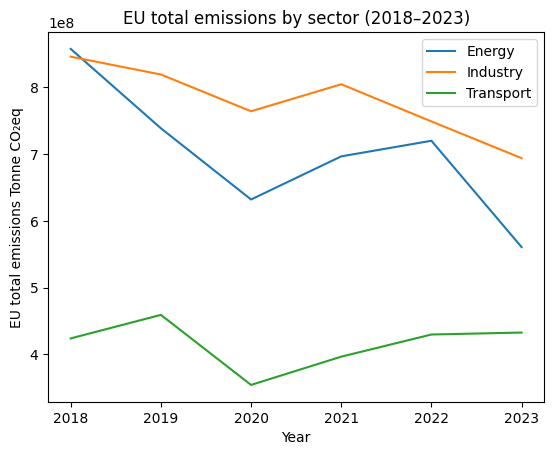

In [31]:
# Compute Total emissions grouped by year and sector
Total_emissions = df.groupby(["year","sector"], as_index=False)["emissions"].sum()

# Display Table
display(Total_emissions)

# Line Plot

for sector in Total_emissions["sector"].unique():
    data = Total_emissions[Total_emissions["sector"] == sector]
    plt.plot(data["year"], data["emissions"], label=sector)

plt.xlabel("Year")
plt.ylabel("EU total emissions Tonne CO₂eq")
plt.title("EU total emissions by sector (2018–2023)")
plt.legend()

# Show Plot
plt.show()


The table provides an overview on emissions trends across sectors over time.

The plot shows EU-level sectoral emissions trends over the study period.

Transport emissions fluctuate over the years but return close to their initial level by the end of the period.

Both the energy and industry sectors showed a decline in emissions between the first and the last

year, with the energy sector displaying a relatively steady downward trend.




**Year-to-year emissions change per country-sector**
   - Select relevant columns
   - Sort by "country", "sector" and "year"
   - Compute year-to-year emissions change using groupby ("country","sector")
   - Visualization Plot

The result shows how each sector's emissions evolves over the years within each country

,country,year,sector,emissions,emissions_change
0,Austria,2018,Energy,7558021.91,NaN
3,Austria,2019,Energy,7626499.37,68477.46
6,Austria,2020,Energy,6307297.65,-1319201.72
9,Austria,2021,Energy,6296765.67,-10531.98
12,Austria,2022,Energy,6244717.28,-52048.39


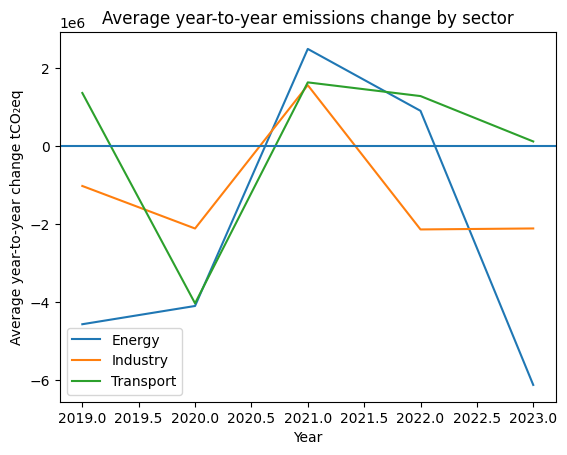

In [39]:
# Compute emissions change
df_change = df[["country","year","sector","emissions"]].sort_values(["country","sector","year"]).copy()
df_change["emissions_change"] = df_change.groupby(["country","sector"])["emissions"].diff()

# Display Table
display(df_change.head())

# Line Plot

# Compute EU-level emissions change average for each sector to remove noises for plot readability
avg_change = (df_change.groupby(["year", "sector"])["emissions_change"].mean().reset_index())

# Plot
for sector in avg_change["sector"].unique():
    data = avg_change[avg_change["sector"] == sector]
    plt.plot(data["year"], data["emissions_change"], label=sector)
plt.axhline(0)
plt.xlabel("Year")
plt.ylabel("Average year-to-year change tCO₂eq")
plt.title("Average year-to-year emissions change by sector")
plt.legend()

# Display Plot
plt.show()

While the table provides information on year-to-year changes in emissions within each country, The plot shows EU-level average trends for clarity.

Transport shows positive average changes at the beginning of the period(1.8 x 10⁶tCO₂eq), followed by a sharp decrease in 2020(-4 x 10⁶ tCO₂eq), after that changes increase again before gradually

decreasing approaching zero by the final year.

Industry starts with negative average changes(-1.5 x 10⁶ tCO₂eq), indicating a decrease in emissions. These reductions persist until a temporary positive spike around 2021(1.5 x 10⁶ tCO₂eq), after

which changes return slightly bellow initial negative levels(-2 x 10⁶ tCO₂eq).

The energy sector displays the most consistent pattern over the period. it begins with negative changes(-4.4 x 10⁶ tCO₂eq), peaks around 2021(2.5 x 10⁶ tCO₂eq), and then starts declining reaching

its lowest values in the final year(-6.2 x 10⁶ tCO₂eq).

**Per-capita emissions**
  - Select relevant columns from the merged dataset
  - Compute per capita emissions and round for readability
  - Bar Chart

,country,year,sector,emissions,population,emissions_per_capita
0,Austria,2018,Energy,7558021.91,8822267,0.856698
1,Austria,2018,Industry,26804803.01,8822267,3.038312
2,Austria,2018,Transport,6998351.72,8822267,0.793260
3,Austria,2019,Energy,7626499.37,8858775,0.860898
4,Austria,2019,Industry,27727938.33,8858775,3.129997


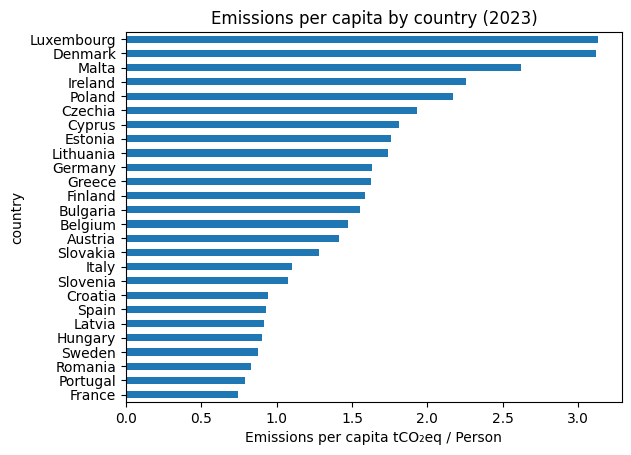

In [38]:
# Compute per-capita emissions
df_per_capita = new_df[["country","year","sector","emissions","population"]].copy()
df_per_capita["emissions_per_capita"] = (df_per_capita["emissions"] / df_per_capita["population"]).round(6)

# Display Table
display(df_per_capita.head())

# Horizontal Bar Chart

# Country level grouping and latest year data filtering
per_capita_2023 = (
    df_per_capita[df_per_capita["year"] == 2023]
    .groupby("country")["emissions_per_capita"]
    .mean()
    .sort_values()
)

per_capita_2023.plot(kind="barh")
plt.xlabel("Emissions per capita tCO₂eq / Person")
plt.title("Emissions per capita by country (2023)")

# Display Chart
plt.show()

The table shows individual emissions(per-capita) for each country-year-sector, while the plot focuses on 2023 per-capita emissions to improve clarity.

 Across Europe, individual emissions differ considerably, ranging from around 0.75 tCO₂eq tonnes per person in countries such as France and portugal to nearly 3.0 tCO₂eq per person in Denmark and Luxembourg.
  Most countries are distributed between these two extremes showing a broad dispersion of per-capita emissions across Europe in 2023.

**Total change over the period per sector per country**
- Filter dataset to keep only 2019 and 2023
- Pivot from long to wide format
- Compute total change
- Rename columns for clarity

year,country,sector,2018 Emissions,2023 Emissions,Emissions Change
0,Austria,Energy,7558021.91,5099475.26,-2458546.65
1,Austria,Industry,26804803.01,25242223.02,-1562579.99
2,Austria,Transport,6998351.72,8316290.35,1317938.63
3,Belgium,Energy,15483340.24,11543579.84,-3939760.40
4,Belgium,Industry,39166642.23,30921535.90,-8245106.33
5,Belgium,Transport,10203259.23,9360222.58,-843036.65
6,Bulgaria,Energy,23524563.57,15381287.18,-8143276.39
7,Bulgaria,Industry,11533865.82,9793607.71,-1740258.11
8,Bulgaria,Transport,7135097.02,4887617.36,-2247479.66
9,Croatia,Energy,3108786.48,3619639.03,510852.55


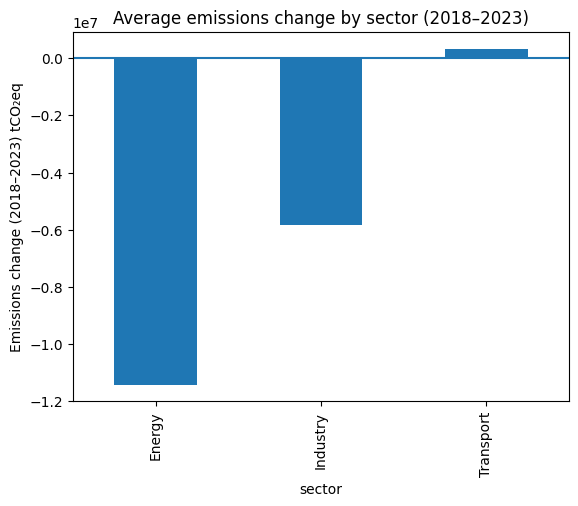

In [40]:
# Create a dataframe filtering the years 2019 and 2023
df_total_change = df[df["year"].isin([2018,2023])].copy()

# Pivot long data to wide data for practice
df_total_change = df_total_change.pivot(index= ["country","sector"],
                                        columns ="year",
                                        values = "emissions").reset_index()
# Add change column
df_total_change["change"] = df_total_change[2023] - df_total_change[2018]

# Rename columns for clarity
df_total_change = df_total_change.rename(columns= {2018:"2018 Emissions",
                                                   2023: "2023 Emissions",
                                                   "change":"Emissions Change"})
 # Display Table
display(df_total_change.head(10))


# Bar Chart

# Compute EU-wide emissions change average per sector
change_19_23 = (df_total_change.groupby("sector")["Emissions Change"].mean())

change_19_23.plot(kind="bar")
plt.ylabel("Emissions change (2018–2023) tCO₂eq")
plt.title("Average emissions change by sector (2018–2023)")
plt.axhline(0)

#  Display Chart
plt.show()

The table provides information on country-sector emissions reductions over the entire study period, whereas the bar chart shows EU-level average sectoral emissions

changes over the period for clarity.

The energy and industry sectors exhibit a net decrease in emissions over the study period.

The energy sector shows the largest average reductions, with emissions decreasing by around 1.15 x 10⁷ tCO₂eq.

The industry sector follows with average reductions of approximately 0.6 x 10⁷ tCO₂eq.

In contrast, the transport sector displays a slight increase in emissions, with an average rise of about 0.05 x 10⁷ tCO₂eq.



**Ranking of countries by emissions reduction**

- Create a ranking column
- Compute top 10 increases countries
- Compute top 10 decreases countries
- Plot


year,country,sector,2018 Emissions,2023 Emissions,Emissions Change,Ranking
0,Austria,Energy,7558021.91,5099475.26,-2458546.65,45
1,Austria,Industry,26804803.01,25242223.02,-1562579.99,40
2,Austria,Transport,6998351.72,8316290.35,1317938.63,5
3,Belgium,Energy,15483340.24,11543579.84,-3939760.40,53
4,Belgium,Industry,39166642.23,30921535.90,-8245106.33,61
...,...,...,...,...,...,...
73,Spain,Industry,86362249.36,67445620.21,-18916629.15,72
74,Spain,Transport,35511997.47,37012521.40,1500523.93,4
75,Sweden,Energy,6744818.13,5314482.90,-1430335.23,36
76,Sweden,Industry,15910448.97,14451310.38,-1459138.59,37


year  country    sector  2018 Emissions  2023 Emissions  Emissions Change  \
30    Germany    Energy    2.702918e+08    1.704206e+08      -99871177.52   
57     Poland    Energy    1.504417e+08    1.144292e+08      -36012427.16   
31    Germany  Industry    2.093457e+08    1.751068e+08      -34238907.80   
72      Spain    Energy    5.857987e+07    2.973553e+07      -28844341.94   
42      Italy    Energy    8.754270e+07    6.380916e+07      -23733533.70   
28     France  Industry    9.274833e+07    7.098359e+07      -21764736.96   
73      Spain  Industry    8.636225e+07    6.744562e+07      -18916629.15   
33     Greece    Energy    3.395598e+07    1.575982e+07      -18196157.39   
58     Poland  Industry    9.173076e+07    7.604020e+07      -15690553.38   
15    Czechia    Energy    4.984307e+07    3.607496e+07      -13768115.59   

year  Ranking  
30         78  
57         77  
31         76  
72         75  
42         74  
28         73  
73         72  
33         71  
58      

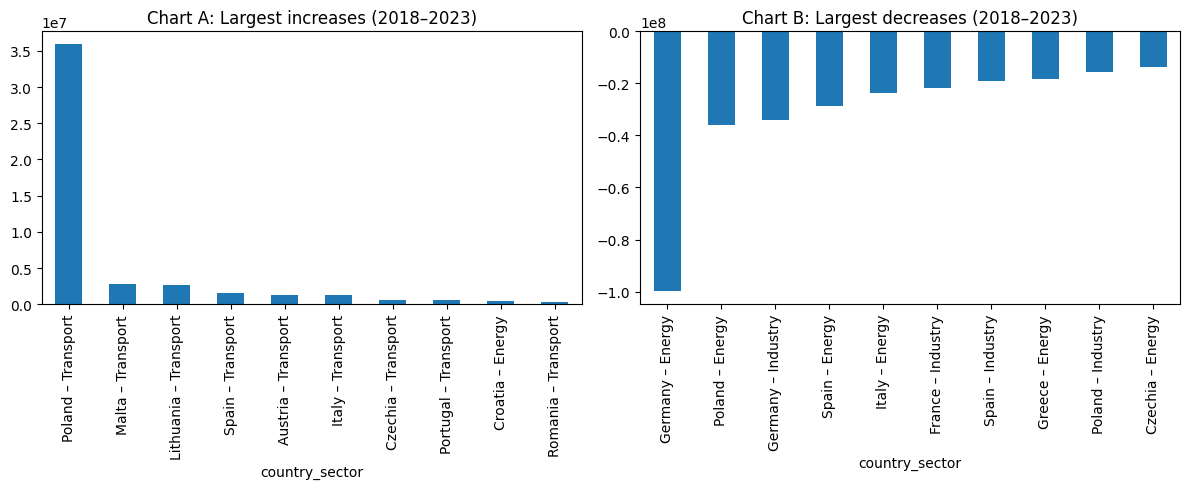

In [37]:
# Create a ranking column by "emissions change"
df_total_change["Ranking"] =df_total_change["Emissions Change"].rank(ascending= False, method= "dense").astype(int)

# Display Table
display(df_total_change)


# Chart

# Compute 10 top increases and 10 top decreases
top_decreases = df_total_change.sort_values("Emissions Change").head(10)
top_increases = df_total_change.sort_values("Emissions Change", ascending=False).head(10)

# Add country_sector column for each dataframe to make plotting easier
top_decreases["country_sector"] = top_decreases["country"] + " – " + top_decreases["sector"]
top_increases["country_sector"] = top_increases["country"] + " – " + top_increases["sector"]


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

top_decreases.plot(
    x="country_sector",
    y="Emissions Change",
    kind="bar",
    ax=ax[1],
    title="Chart B: Largest decreases (2018–2023)",
    legend=False
)
top_increases.plot(
    x="country_sector",
    y="Emissions Change",
    kind="bar",
    ax=ax[0],
    title="Chart A: Largest increases (2018–2023)",
    legend=False
)


plt.tight_layout()

# Display Plots
plt.show()

The table presents country-sector rankings by emissions change over the study period.

Charts A and B show top 10 country-sector laggards and leaders in emissions reduction respectively.

In chart A, the transport sector drives the largest sectoral increases, particularly  in Poland (3.52 x 10⁷ tCO₂eq) as well as in lithuania and malta ( both

approximately 0.25 x 10⁷ tCO₂eq). The remaining seven increases are close to zero and correspond to Spain, Austria, Italy, Czechia, Portugal, Croatia ( energy

sector) and Romania.

In chart B the largest decreases occur in the energy and industry sectors. The energy sector in Germany records the largest reduction (1 x 10⁸ tCO₂eq), smaller

reductions follow ranging between  0.17 and 0.37 x 10⁸ tCO₂eq and corresponding to the following countries: Germany, Poland, Spain,Italy, France, Greece and

Czechia.


**SUMMARY**

- Transport sector GHG emissions fluctuated over the study period and remained close to their initial levels by 2023.

- Per-capita GHG emissions in 2023 show a broad dispersion across EU countries.

- Energy is the leader sector in GHG emissions reductions, followed by the industry sector. The transport sector achieved only minor reductions across the EU.

- The largest country-sector increases are mostly observed in Eastern European countries within the transport sector, While the largets decreases occur mainly in

  Western European countries within the energy and industry sectors.

- Germany records the largest overall reductions, while both the energy and industry sectors appearing among the top 3 country-sector decreases.

